<a href="https://colab.research.google.com/github/gmanojkumar402-max/KNN/blob/master/KNN_Decision_Boundary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

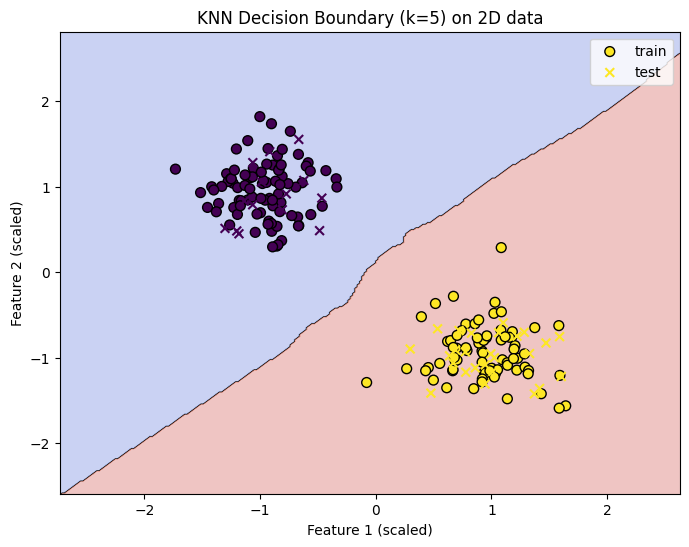

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1) Create toy 2D data (like Social_Network_Ads using Age & Salary)
X, y = make_blobs(n_samples=200, centers=2, cluster_std=1.2, random_state=42)

# optional: scale features so axes are comparable
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train/test split (not strictly needed for the plot, but good practice)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 1) Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 2) Create a mesh grid that covers the data range
h = 0.02  # step size for the mesh; smaller = finer boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# 3) Classify each point on the grid
grid_points = np.c_[xx.ravel(), yy.ravel()]   # shape: (num_grid_points, 2)
Z = knn.predict(grid_points)                  # predictions for each grid point
Z = Z.reshape(xx.shape)                       # shape -> (ny, nx) same as xx,yy

# 4) Plot the grid as a colored image (decision regions)
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)  # colored regions
plt.contour(xx, yy, Z, levels=[0.5], colors='k', linewidths=0.5) # optional: boundary contour

# 5) Overlay train points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=50, label='train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', s=40, label='test')

plt.title("KNN Decision Boundary (k=5) on 2D data")
plt.legend()
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()


What each block does (line-by-line summary):

make_blobs: creates sample 2D data with two classes.

StandardScaler: optional; makes axes comparable.

KNeighborsClassifier(...).fit(...): trains KNN.

np.meshgrid(...): creates the grid of X/Y coordinates.

np.c_[...]: stacks columns so predict gets shape (N, 2).

knn.predict(...) → Z.reshape(...): predicted class for each grid point in grid shape.

plt.contourf(...): paints the grid with colors per class.

plt.scatter(...): plots original data on top.